# Descente de Gradient

Dans de nombreux domaines, on s'intéresse à l'optimisation de paramètres. On peut penser à la régression linéaire où on cherche la droite qui fit au mieux notre nuage de points. Cette optimisation se fait par la recherche de minimum d'une fonctionnelle. On cherchera lorsque c'est possible à atteindre un minimum global ou non pas local.

Pour cela, on se place dans un Hilbert $V$. Soit $J$ la fonctionnelle, on cherche un $x \in V$ tel que : 
$$
\begin{equation*}
    J(x) \leq J(y) \quad \quad \forall y \in V 
\end{equation*}
$$

L'idée est de construire un algorithme itératif tel que : 
$$
\begin{equation*}
    x^{k+1} = x^{k} - \rho_k d^k
\end{equation*}
$$
avec :         
    - $\rho_k$ le pas        
    - $d^k$ la direction de descente 

## 1 - Cas Quadratique : 

Ici la fonctionnelle J est à valeurs dans $\mathbb{R}^n$ :
$$
\begin{equation*}
    J(v) = <Av,v> + <b,v> 
\end{equation*}
$$
Avec $A$ une matrice symétrique réelle définie positive et b un vecteur de $\mathbb{R}^n$.      
Déterminons la dérivée d'une telle fonction :      
Soit $h \in \mathbb{R}^{n}$ 
$$
\begin{align*}
    J(v+h) &= \langle A(v+h),v+h \rangle + \langle b,v+h \rangle \\
    &= \langle Av,v \rangle + \langle Av,h \rangle + \langle Ah,v \rangle + \langle Ah,h \rangle + \langle b,v \rangle + \langle b,h \rangle \\
    &= \langle Av,v \rangle + \langle b,v \rangle + \langle Av,h \rangle + \langle Ah,v \rangle + \langle Ah,h \rangle + \langle b,h \rangle \\
    &= J(v) + \langle Ah,v \rangle + \langle Av,h \rangle + \mathcal{O}(||h||^2) \\
    &= J(v) + \langle h,(A^{t} + A)v \rangle + \langle b,h \rangle +  \mathcal{O}(||h||^2) \\
    &= J(v) + \langle h, 2Av \rangle + \langle b,h \rangle  + \mathcal{O}(||h||^2) \quad A \text{ est symétrique}\\ 
\end{align*}
$$
Donc : 
$$
\begin{equation*}
    \nabla J(v) = 2Av + b
\end{equation*}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

In [60]:
## paramètres simulation
N = 50 #discrétisation spatiale
n = 5 # intervalle [-n;n]

In [66]:
A = np.identity(2)
b = np.zeros(2)

In [67]:
J = lambda v : np.dot(np.dot(A,v),v) + np.dot(b,v)
J_prime = lambda v : np.dot(A+A.T,v)

In [68]:
x = np.linspace(-n,n,N)
y = np.linspace(-n,n,N)
X, Y = np.meshgrid(x,y)

In [69]:
M = np.zeros((N,N))
for i in range(len(x)):
    for j in range(len(y)):
        v = np.array([x[i],y[j]])
        M[i,j] = J(v)

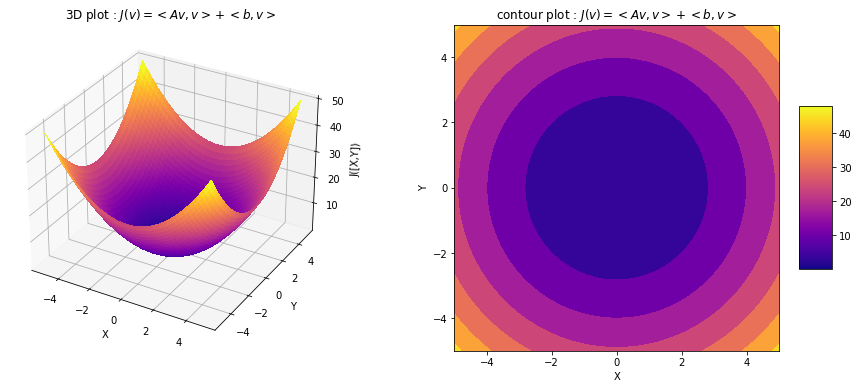

In [70]:
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(121,projection='3d'); ax2 = fig.add_subplot(122)

surf = ax1.plot_surface(X, Y, M, rstride=1, cstride=1, cmap='plasma', linewidth=0, antialiased=False)
ax1.set_xlabel("X") ; ax1.set_ylabel("Y") ; ax1.set_zlabel("J([X,Y])")
ax1.set_title("3D plot : $J(v) = <Av,v> + <b,v> $")

fig.colorbar(surf, shrink=0.5, aspect=5)

cp = ax2.contourf(X, Y, M, cmap = "plasma")
ax2.set_xlabel("X") ; ax2.set_ylabel("Y") ;
ax2.set_title("contour plot : $J(v) = <Av,v> + <b,v> $")

plt.show()

In [9]:
def gradient_pas_opti(x0,J,J_prime):
    

SyntaxError: unexpected EOF while parsing (<ipython-input-9-f47bc47240ff>, line 2)

## 2 - Cas non convexe : 

Une hypothèse fondamentale que l'on a fait et la convexité. Si on s'intéresse à des fonctions non convexes, on est absolument pas sûr de converger vers un minimum global ni même converger quelque part. On peut prendre l'exemple de la fonction suivante :

$$
\begin{align*}
    f(x) &= x^2 + 15sin(x) \\
    f^{'}(x) &= 2x + 15cos(x)
\end{align*}
$$

In [13]:
t = np.linspace(-10,10,100)
x0 = -5.5

In [14]:
f = lambda x : x**2 + 15*np.sin(x)
f_prime = lambda x : 2*x + 15*np.cos(x)

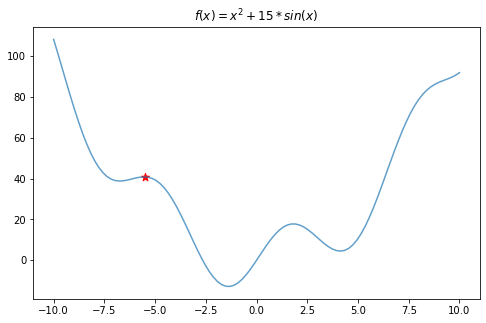

In [23]:
plt.subplots(figsize=(8,5))
plt.plot(t,f(t), alpha = 0.7)
plt.scatter(x0,f(x0), c = 'r', marker = '*', s = 70)
plt.title("$f(x) = x^2 + 15 * sin(x)$")
plt.show()

In [25]:
def gradient_test(f,g,x0 = x0 ,pas = 0.1, epsilon = 0.2, kmax = 1000):
    iteres = [x0]
    xk = x0
    grad_xk = g(xk)
    k = 0
    while ( (np.abs(grad_xk) >= epsilon) & (k < kmax)):
        xk = xk - pas * grad_xk
        grad_xk = g(xk)
        
        iteres.append(xk)
        k += 1
    return iteres

In [52]:
iteres_bon = np.array(gradient_test(f,f_prime))
iteres_mauvais = np.array(gradient_test(f,f_prime, pas = 0.3))

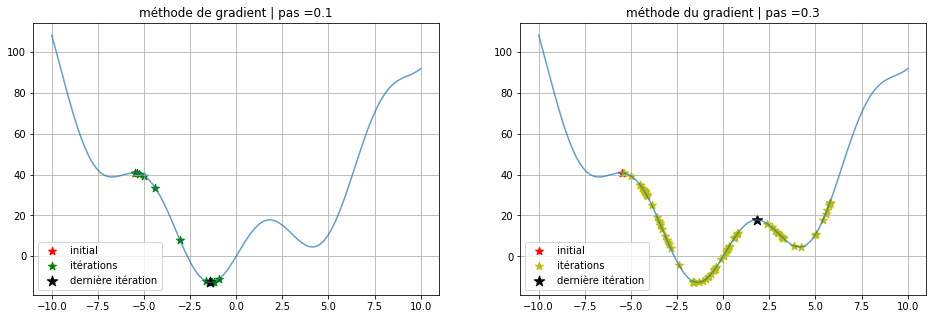

In [56]:
fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(121); ax2 = fig.add_subplot(122)

ax1.plot(t,f(t), alpha = 0.7)
ax2.plot(t,f(t), alpha = 0.7)

ax1.scatter(x0,f(x0), c = 'r', marker = '*', s = 70, label = "initial")
ax2.scatter(x0,f(x0), c = 'r', marker = '*', s = 70, label = "initial")

ax1.scatter(iteres_bon[1:],f(iteres_bon[1:]), c= 'g', marker = '*', s =70, label = "itérations")
ax2.scatter(iteres_mauvais[1:],f(iteres_mauvais[1:]), c= 'y', marker = '*', s =70, label = "itérations")

ax1.scatter(iteres_bon[-1],f(iteres_bon[-1]), c= 'k', marker = '*', s =120, label = "dernière itération")
ax2.scatter(iteres_mauvais[-1],f(iteres_mauvais[-1]), c= 'k', marker = '*', s =120, label = "dernière itération")

ax1.set_title("méthode de gradient | pas ={}".format(0.1)) 
ax2.set_title("méthode du gradient | pas ={}".format(0.3))
ax1.grid(); ax2.grid()
ax1.legend() ; ax2.legend()
plt.show()

Même en supposant qu'on ait un bon pas, on est très sensible à l'itération initiale car on risque de converger vers un minimum local et non pas global

In [58]:
iteres_bon = np.array(gradient_test(f,f_prime))
iteres_mauvais = np.array(gradient_test(f,f_prime, x0 = x0-0.1))

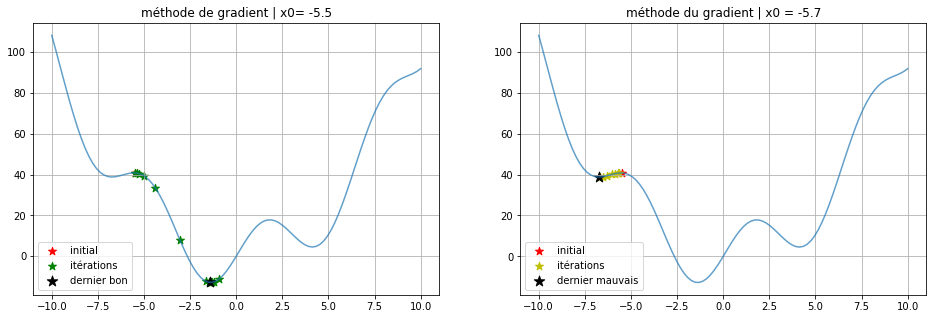

In [59]:
fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(121); ax2 = fig.add_subplot(122)

ax1.plot(t,f(t), alpha = 0.7)
ax2.plot(t,f(t), alpha = 0.7)

ax1.scatter(x0,f(x0), c = 'r', marker = '*', s = 70, label = "initial")
ax2.scatter(x0,f(x0), c = 'r', marker = '*', s = 70, label = "initial")

ax1.scatter(iteres_bon[1:],f(iteres_bon[1:]), c= 'g', marker = '*', s =70, label = "itérations")
ax2.scatter(iteres_mauvais[1:],f(iteres_mauvais[1:]), c= 'y', marker = '*', s =70, label = "itérations")

ax1.scatter(iteres_bon[-1],f(iteres_bon[-1]), c= 'k', marker = '*', s =120, label = "dernier bon")
ax2.scatter(iteres_mauvais[-1],f(iteres_mauvais[-1]), c= 'k', marker = '*', s =120, label = "dernier mauvais")

ax1.set_title("méthode de gradient | x0= {}".format(x0)) ; 
ax2.set_title("méthode du gradient | x0 = {}".format(x0-0.2))
ax1.grid(); ax2.grid()
ax1.legend() ; ax2.legend()
plt.show()

On peut aussi regarder le cas 2D :
$$
\begin{equation*}
    F(x,y) = 15 sin\left( \frac{1}{2}x^2 - \frac{1}{4} y^2 + 3 \right) cos\left( 2x + 1 - e^y \right)
\end{equation*}
$$

In [91]:
F = lambda x,y : 15*np.sin( (x**2 / 2) - (y**2 /4) + 3 )*np.cos(2*x + 1 - np.exp(y)  )

In [92]:
x = np.linspace(-2,2,N)
y = np.linspace(-2,2,N)
X,Y = np.meshgrid(x,y)

In [93]:
Z = F(X,Y)

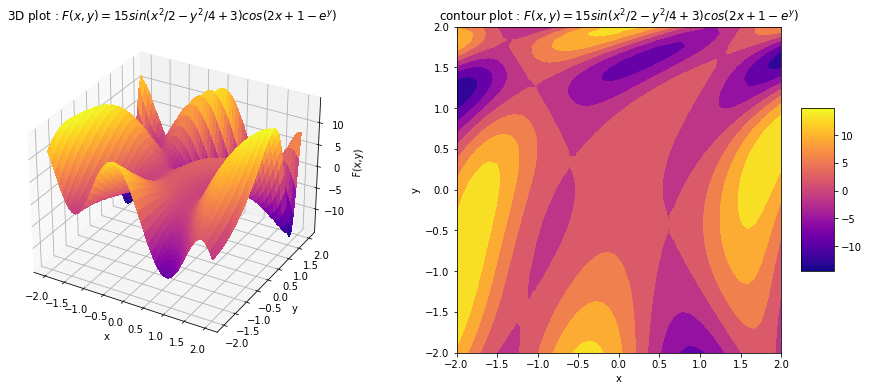

In [94]:
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(121,projection='3d'); ax2 = fig.add_subplot(122)

surf = ax1.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='plasma', linewidth=0, antialiased=False)
ax1.set_xlabel("x") ; ax1.set_ylabel("y") ; ax1.set_zlabel("F(x,y)")
ax1.set_title("3D plot : $F(x,y) = 15 sin( x^2/2 - y^2/4 + 3 ) cos( 2x + 1 - e^y ) $")

fig.colorbar(surf, shrink=0.5, aspect=5)

cp = ax2.contourf(X, Y, Z, cmap = "plasma")
ax2.set_xlabel("x") ; ax2.set_ylabel("y") ;
ax2.set_title("contour plot : $F(x,y) = 15 sin( x^2/2 - y^2/4 + 3 ) cos( 2x + 1 - e^y ) $")

plt.show()